In [1]:
import os, sys, time
import tifffile as tif
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
affinefile = "/home/emilyjanedennis/Desktop/mouseann_to_rat_AFFINE.tif"
mouseratfile="/home/emilyjanedennis/Desktop/mouseann_to_rat.tif"

In [3]:
affine = tif.imread(affinefile)
mouserat = tif.imread(mouseratfile)

In [4]:
csvfilename="/home/emilyjanedennis/Desktop/ls_id_table_w_voxelcounts.csv"
anns=pd.read_csv(csvfilename,usecols=[1,2,3])

In [5]:
df=anns

In [6]:
df.insert(3,'affine_vox',0)
df.insert(4,'mouserat_vox',0)

In [7]:
df

,name,acronym,id,affine_vox,mouserat_vox
0,root,root,997,0,0
1,Basic cell groups and regions,grey,8,0,0
2,Cerebrum,CH,567,0,0
3,Cerebral cortex,CTX,688,0,0
4,Cortical plate,CTXpl,695,0,0
...,...,...,...,...,...
1325,parafloccular sulcus,pfs,65,0,0
1326,Interpeduncular fossa,IPF,624,0,0
1327,retina,retina,304325711,0,0
1328,"Primary somatosensory area, unassigned, layer ...",SSp-un1,182305696,0,0


0          997
1            8
2          567
3          688
4          695
5          315
6          184
7           68
8          667
9    526157192
Name: id, dtype: int64

In [19]:
for i in range(0,np.size(df['id']-1)):
    df.mouserat_vox[i] = np.size(mouserat[mouserat==df.id[i]])
    df.affine_vox[i] = np.size(affine[affine==df.id[i]])

/home/emilyjanedennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/emilyjanedennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df.to_csv(r"/home/emilyjanedennis/Desktop/test.csv")

In [21]:
df['change'] = df['affine_vox']-df['mouserat_vox']

In [22]:
df

,name,acronym,id,affine_vox,mouserat_vox,change
0,root,root,997,13155,13429,-274
1,Basic cell groups and regions,grey,8,10084,10361,-277
2,Cerebrum,CH,567,17749,17340,409
3,Cerebral cortex,CTX,688,20489,20859,-370
4,Cortical plate,CTXpl,695,23022,22532,490
...,...,...,...,...,...,...
1325,parafloccular sulcus,pfs,65,8422,8410,12
1326,Interpeduncular fossa,IPF,624,20052,20026,26
1327,retina,retina,304325711,0,0,0
1328,"Primary somatosensory area, unassigned, layer ...",SSp-un1,182305696,0,0,0


22532

23022

In [25]:
dfpercent = df['change']/df['mouserat_vox']*100
dfpercent[np.isinf(dfpercent)]=0
df['percent'] = dfpercent
dfpercent.replace(0,np.nan)

0      -2.040360
1      -2.673487
2       2.358708
3      -1.773815
4       2.174685
          ...   
1325    0.142687
1326    0.129831
1327         NaN
1328         NaN
1329         NaN
Length: 1330, dtype: float64

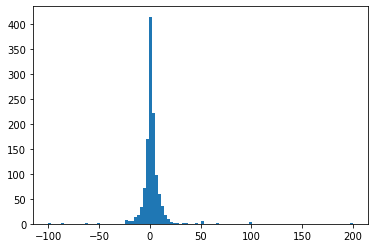

In [26]:
plt.hist(dfpercent,bins=100)
plt.show()

In [27]:
mp = np.nanmedian(df['percent'])
sp = np.nanstd(df['percent'])

In [28]:
highmp = mp+2*sp

In [29]:
lowmp = mp-2*sp

In [30]:
twoxh = df[df['percent']> highmp]
twoxl = df[df['percent']< lowmp]
toox = df[df['percent'] > lowmp]
toox = toox[toox['percent']< highmp]

In [54]:
# add list of unique values not in twoxh/twoxl but in mouserat

12998

In [50]:
mouserat_relative = mouserat

In [51]:
xm,ym,zm = np.shape(mouserat)

In [33]:
mouserat_relative[mouserat_relative>np.amax(twoxh)]=0

In [34]:
for i in toox['id']:
    mouserat_relative[mouserat_relative==i]=0

In [44]:
txhp = twoxh['percent']
txlp = twoxl['percent']

35
36
452
1021
1028
1035
1037
1048
1049
1050
1054
1060
1061
1062
1065
1087


In [45]:

for i in txhp.index:
    mouserat_relative[mouserat_relative==i]=txhp[i]
    
for i in txlp.index:
    mouserat_relative[mouserat_relative==i]=txlp[i]

In [46]:
tif.imsave("mouserat_relative.tif",mouserat_relative.astype("uint16"))

-32768